In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style("ticks")

In [2]:
cd ~/OneDrive/Diaporthe/csv_files

C:\Users\chris\OneDrive\Diaporthe\csv_files


In [3]:
cultivar_data = pd.read_csv("cultivar_pathogenicity.csv")
isolate_data = pd.read_csv("isolate_pathogenicity.csv")

In [4]:
cultivar_data.head(2)

,isolate_id,cultivar,replicate,dpo,percent_infected
0,MAC-17-47,HAES-789,1,9,68.90
1,MAC-17-47,HAES-789,2,9,93.62


In [5]:
cult_test = pd.pivot_table(cultivar_data, index=['replicate'], columns=['cultivar', 'dpo'], values=['percent_infected'])

In [6]:
cult_test

percent_infected                                                  \
cultivar          HAES-783                 HAES-789               HAES-794   
dpo                     9       12      14       9      12     14       9    
replicate                                                                    
1                     0.00    7.96   50.62    68.90  100.0  100.0      0.0   
2                     0.00  100.00  100.00    93.62  100.0  100.0      0.0   
3                    12.65   97.41  100.00    85.65  100.0  100.0      0.0   

                                                 
cultivar               HAES-853                  
dpo          12     14       9       12      14  
replicate                                        
1          3.84  29.15     2.02  100.00  100.00  
2          0.00   0.00     0.00    8.35   54.51  
3          2.31  46.77     0.00   86.04  100.00

In [7]:
cultivar_data.head(2)

,isolate_id,cultivar,replicate,dpo,percent_infected
0,MAC-17-47,HAES-789,1,9,68.90
1,MAC-17-47,HAES-789,2,9,93.62


# Plotting timecourse

Okay, this is quite involved since there are many dimensions to consider (days post inoculation (dpo), the cultivar, and the replicate).
   
First, we create a **pivot table** from our original dataset *cultivar_data*.
1. For this, we select the **index as 'replicate'**. We do this because (I think) we later pass in the aggregate function mean(), and we want the mean for the replicates for each group.
2. The two levels are then our columns: 'dpo' and 'cultivar', which you can think of as providing the unique identifier for each replicate. The order matters here for graphing purposes (although it can technically be adjusted manually I think). We want 'days' besides eachother on the graph for comparison, so we put it first here.

In [8]:
cult_test = pd.pivot_table(cultivar_data, index=['replicate'], columns=['dpo', 'cultivar'],
                           aggfunc=np.mean)

In [22]:
cult_test

percent_infected                                               \
dpo                     9                                   12            
cultivar          HAES-783 HAES-789 HAES-794 HAES-853 HAES-783 HAES-789   
replicate                                                                 
1                     0.00    68.90      0.0     2.02     7.96    100.0   
2                     0.00    93.62      0.0     0.00   100.00    100.0   
3                    12.65    85.65      0.0     0.00    97.41    100.0   

                                                                 
dpo                               14                             
cultivar  HAES-794 HAES-853 HAES-783 HAES-789 HAES-794 HAES-853  
replicate                                                        
1             3.84   100.00    50.62    100.0    29.15   100.00  
2             0.00     8.35   100.00    100.0     0.00    54.51  
3             2.31    86.04   100.00    100.0    46.77   100.00

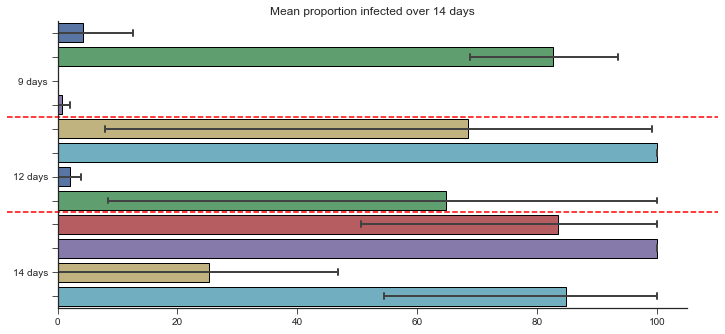

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.barplot(data=cult_test['percent_infected'], orient='h', palette='deep', edgecolor='black',
           capsize=0.25, errwidth=2)


ax.set_yticklabels(["", "", '9 days', "", 
                   "", "", '12 days', "",
                   "", "", '14 days', "",])

h_lines = [3.5,7.5]
[ax.axhline(x, alpha=1, xmin=-0.08, xmax=1.05, clip_on=False,
            linestyle='dashed', color='red') for x in h_lines]


sns.despine()


plt.title("Mean proportion infected over 14 days")


tight = plt.tight_layout(pad=2, w_pad=5, h_pad=5)

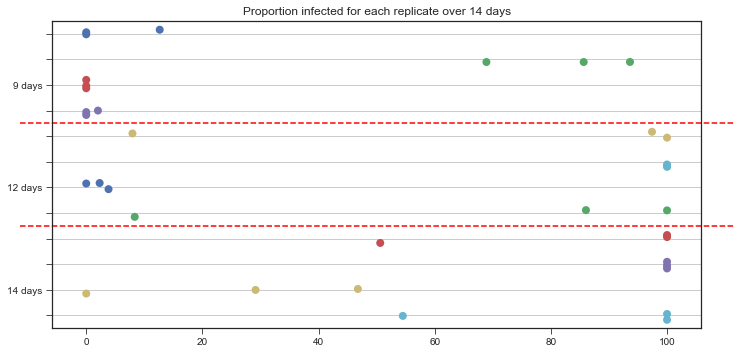

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)


sns.stripplot(data=cult_test['percent_infected'], orient='h', size=8, jitter=0.2, palette='deep')
ax.set_yticklabels(["", "", '9 days', "", 
                   "", "", '12 days', "",
                   "", "", '14 days', "",])

h_lines = [3.5,7.5]
[ax.axhline(x, alpha=1, xmin=-0.05, xmax=1.05, clip_on=False,
            linestyle='dashed', color='red') for x in h_lines]

ax.grid(axis='y', color='gray', alpha=0.5)

plt.title("Proportion infected for each replicate over 14 days")

tight = plt.tight_layout(pad=1, w_pad=1, h_pad=1)